weight initialisation..

1. weight should not intialise with zero
2. it should non-zero constant value
3. should not small random value
4. should not large random value

:-because above steps leads to vanishing gradient descent,saturation problem with 
different activation functions

good techniques are:-
1.Xavier
2.He

Xavier(normal):-
weigth(layer)=random(inputs,neuron at layer)*sqrt(1/neurons at previous layer)

Xavier(unform):-
weight-> [-limit,limit]
limit=sqrt(6/fan-in+fan-out)

He(normal):-
weigth(layer)=random(inputs,neuron at layer)*sqrt(2/neurons at previous layer)

He(uniform):-
weight-> [-limit,limit]
limit=sqrt(6/fan-in)

In [18]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [19]:
df=pd.read_csv('ushape.csv')
df.columns=['x','y','class']

df.head()

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


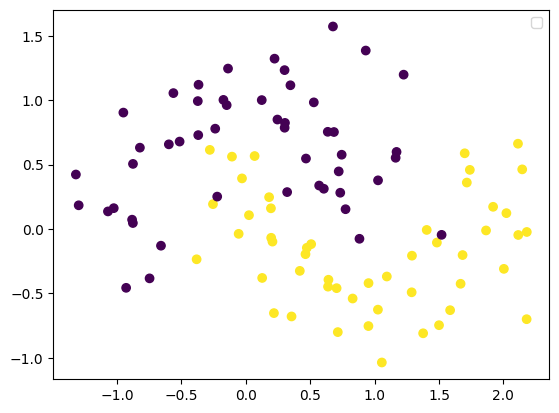

In [20]:
plt.scatter(df['x'],df['y'],c=df['class'])
plt.legend()
plt.show()

In [21]:
X=df.iloc[:,0:2]
y=df.iloc[:,2]

In [22]:
model=Sequential()
model.add(Dense(10,input_dim=2,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.get_weights()

[array([[ 1.105848  ,  0.9922807 , -0.8808484 ,  0.5452749 , -1.1131817 ,
          0.687438  ,  0.7422987 , -1.5716114 , -1.2242279 ,  0.2810084 ],
        [ 1.7502424 ,  1.5592506 ,  1.1779512 , -0.11720034, -1.1226429 ,
          1.7724541 , -0.8606548 , -1.0511681 , -1.3122097 ,  0.7906716 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.08261333, -0.25816977, -0.57863426, -0.08515475,  0.24163744,
         -0.87217945,  0.04969844, -0.8228868 ,  0.38952664, -0.05199329],
        [-0.317521  ,  0.73889154,  0.4979962 , -0.4471701 ,  0.5705443 ,
          0.11674076,  0.1342784 , -0.41997516,  0.06317525,  0.3092255 ],
        [-0.0598771 , -0.12214259,  0.27581972,  0.10015423, -0.04126583,
          0.84446377,  0.2153964 ,  0.03328237,  0.6714066 ,  0.8054353 ],
        [ 0.43428624, -0.02490289,  0.88036203, -0.26648968,  0.12655082,
          0.27186087,  0.37916425,  0.4294713 ,  0.1342874 , -0.16037421],
        [ 0.75600

In [25]:
initial_weights=model.get_weights()

In [26]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [27]:
model.set_weights(initial_weights)

In [28]:
model.get_weights()

[array([[-0.18940623,  1.0514383 ,  1.1123022 , -0.19721183,  0.20493813,
         -0.16075964, -0.2863974 , -0.00953061,  0.51833737, -0.64259046],
        [ 0.2715409 , -0.50979006,  0.30476594, -1.0708135 ,  0.01271901,
          1.3468697 ,  0.6284487 ,  0.26452172,  0.6158971 ,  0.44148725]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.00337421, -0.61037356,  0.12350975, -0.36020204, -0.31711575,
         -0.11721049,  0.14172779, -0.02018079, -0.39074713, -0.2587084 ],
        [-0.30815682,  0.06309669, -0.09405801,  0.22968839, -0.5945729 ,
          0.53037   , -0.14734857,  0.4303712 ,  0.3511969 , -0.16810675],
        [-0.7025772 ,  0.36742482,  0.31858537, -0.23698953, -0.1907908 ,
         -0.30857828, -0.20898113, -0.36542997, -0.21527402,  0.34551343],
        [-0.29247406,  0.4730822 , -0.0923476 ,  0.4485265 , -0.1388031 ,
          0.37200063, -0.2796564 ,  0.75085163, -0.17308442, -0.32689196],
        [ 0.12872

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(X,y,epochs=100,validation_split=0.2)  #validation_split=0.2 means 20% of data will be used for validation


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4617 - loss: 0.7021 - val_accuracy: 0.5000 - val_loss: 0.6763
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5007 - loss: 0.6877 - val_accuracy: 0.5000 - val_loss: 0.6703
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5125 - loss: 0.6847 - val_accuracy: 0.5500 - val_loss: 0.6642
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4773 - loss: 0.6813 - val_accuracy: 0.5500 - val_loss: 0.6586
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5696 - loss: 0.6669 - val_accuracy: 0.5500 - val_loss: 0.6527
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5251 - loss: 0.6648 - val_accuracy: 0.6000 - val_loss: 0.6456
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5222 - loss: 0.6639 - val_accuracy: 0.6000 - val_loss: 0.6383
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5558 - loss: 0.6537 - val_accuracy: 0.6500 - val_loss:

In [31]:
model.get_weights()

[array([[-0.2678763 ,  1.2259967 ,  0.9659613 , -0.25143257,  0.23089266,
         -0.17749934, -0.18974876, -0.06556831,  0.6824224 , -0.85985035],
        [ 0.17526123, -0.6762075 ,  0.2976854 , -1.0937947 , -0.20860696,
          1.5211841 ,  0.8251153 ,  0.11983715,  0.7068165 ,  0.47802186]],
       dtype=float32),
 array([-0.01399963,  0.155332  , -0.17539144,  0.1544155 ,  0.02466912,
         0.15516695,  0.12352473, -0.12360655,  0.03487451, -0.05241345],
       dtype=float32),
 array([[-0.08642092, -0.6681212 ,  0.27620372, -0.22600362, -0.31711575,
          0.00310822,  0.14172779, -0.25657928, -0.5444357 , -0.30830398],
        [-0.25833324,  0.085091  , -0.1759904 ,  0.1962365 , -0.5945729 ,
          0.62294394, -0.14734857,  0.5668149 ,  0.46141553, -0.13038504],
        [-0.7848549 ,  0.35224035,  0.324826  , -0.12085915, -0.1907908 ,
         -0.19224258, -0.20898113, -0.30559307, -0.17499438,  0.401078  ],
        [-0.58708596,  0.5841503 , -0.011987  ,  0.3915611 , 